# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Aula 1

In [9]:
MVL_PATH = 'https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv'
ratings_df = pd.read_csv(MVL_PATH)

In [10]:
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [13]:
ratings_df.shape
#Número de linhas, número de colunas

(100836, 4)

In [19]:
ratings_df.columns = ['userId', 'movieId', 'ratingValue', 'timeStamp']
ratings_df.head(3)

,userId,movieId,ratingValue,timeStamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [18]:
ratings_series = ratings_df['ratingValue']
ratings_series.head(3)

0    4.0
1    4.0
2    4.0
Name: ratingValue, dtype: float64

In [20]:
ratings_df.describe()

,userId,movieId,ratingValue,timeStamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [21]:
ratings_series.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [24]:
#Conta quantas vezes um valor único foi registrado
ratings_series.value_counts() 

ratingValue
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [32]:
ratings_mvl_mean = ratings_series.mean()
print(f'Média de notas (geral): {round(ratings_mvl_mean, 3)}')

Média de notas (geral): 3.502


<Axes: ylabel='Frequency'>

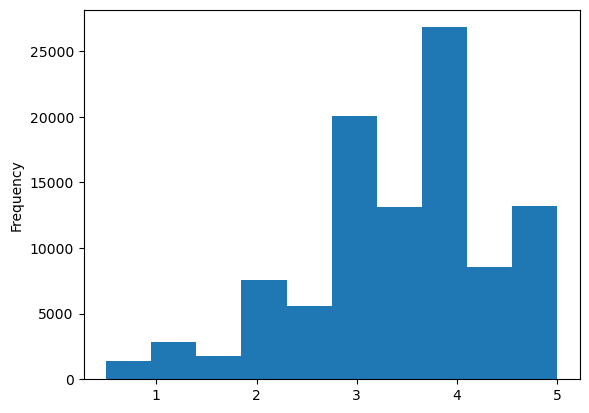

In [29]:
#histograma -> frequência (contagem de valores únicos)
ratings_series.plot(kind='hist')

In [31]:
ratings_mvl_median = ratings_series.median()
print(f'Mediana de notas (geral): {round(ratings_mvl_median, 3)}')

Mediana de notas (geral): 3.5


In [33]:
ratings_series.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: ratingValue, dtype: float64

<Axes: ylabel='ratingValue'>

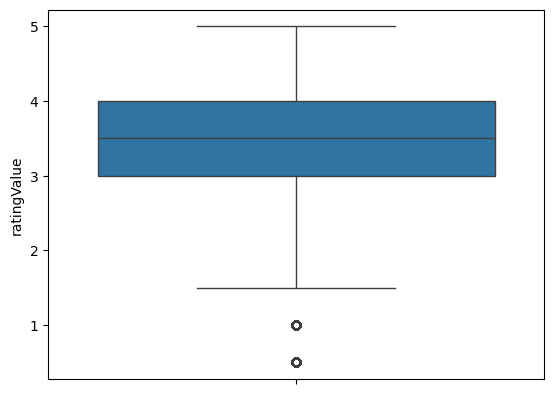

In [35]:
#boxplot -> distribuição por quartis e outliers
sns.boxplot(ratings_series)

## Dataframes

In [9]:
# Criando um DataFrame simples
#Keys como nome das colunas e values(lista) como valores das linhas
#Estrutura tabular de linhas e colunas
dados = {
    'Nome': ['Mirla', 'Ana', 'Daniel'],
   'Idade': [25, 30, 35],
    'Salario': [5000, 6000, 8000]
}
df = pd.DataFrame(dados)
df

,Nome,Idade,Salario
0,Mirla,25,5000
1,Ana,30,6000
2,Daniel,35,8000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nome     3 non-null      object
 1   Idade    3 non-null      int64 
 2   Salario  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [5]:
df['Salario'].mean()

6333.333333333333

In [8]:
#Series -> sequencia de valoes indexados ordenados
ages = pd.Series([45, 30, 45, 40, 25])
ages

0    45
1    30
2    45
3    40
4    25
dtype: int64

In [10]:
ages.index

RangeIndex(start=0, stop=5, step=1)

In [11]:
ages.sort_values()

4    25
1    30
3    40
0    45
2    45
dtype: int64